# **UNICEF Project - ARIMA model for rainfall forecasting**

**District - Colombo**

**Station - Angoda Mental Hospital**

### Install pyramid-arima and necessary python libraries

In [62]:
!pip install -q pyramid-arima
!pip install -q patsy
!python3.6 -m pip install scipy==1.2 --upgrade


Requirement already up-to-date: scipy==1.2 in /usr/local/lib/python3.6/dist-packages (1.2.0)


### Import the libraries

In [0]:
import pandas as pd
from matplotlib import  pyplot
from pyramid.arima import  auto_arima

### Read the data file (CSV file) from the Google drive (Own Google Drive)
#### Mount the Google Drive

In [64]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Read the CSV file using Pandas and convert to standard date-time format

In [65]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Unicef_project/rainfall_Colombo_Angoda.csv', index_col=0)
data.index = pd.to_datetime(data.index)
print(data.index)


DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', length=132, freq=None)


### Create the ARIMA model
Choose the parameters carefully.

In [66]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=1, seasonal=True, d=1, D=1, trace=True, error_action='ignore', 
                           suppress_warnings=True, stepwise=True)

print(stepwise_model.aic())


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1550.177, BIC=1566.852, Fit time=2.487 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1671.300, BIC=1676.858, Fit time=0.180 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1609.303, BIC=1620.420, Fit time=0.583 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1549.460, BIC=1560.576, Fit time=1.301 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1549.328, BIC=1563.224, Fit time=2.333 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1580.638, BIC=1591.755, Fit time=1.356 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1552.932, BIC=1569.607, Fit time=4.599 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1613.297, BIC=1621.634, Fit time=0.370 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=1553.307, BIC=1572.761, Fit time=6.316 seconds
Fit ARIMA: order=(0, 1, 0) s

### Create the train and test datasets

In [67]:
train = data.loc['2009-01-01':'2019-04-01']
test = data.loc['2019-01-01':]

print(len(train), len(test))

124 12


### Train the ARIMA model

In [68]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

### Predict for 12 steps ahead

In [69]:
future_forecast = stepwise_model.predict(n_periods=12)
print(future_forecast)


[380.83233781 170.63291942  59.80733237  85.8059332  234.5613459
 333.25504725 301.03216505 148.47046918  30.03261043  58.40017695
  78.53285252 232.7673324 ]


### Create a table with the current rainfall stat and the predicted stats

In [70]:
future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])

data_n = pd.concat([test, future_forecast], axis=1)
print(data_n)

            Colombo rainfall stats - Station:Angoda Hospital  Prediction
2019-01-01                                               3.5  380.832338
2019-02-01                                             217.0  170.632919
2019-03-01                                             140.9   59.807332
2019-04-01                                             140.3   85.805933
2019-05-01                                               0.0  234.561346
2019-06-01                                               0.0  333.255047
2019-07-01                                               0.0  301.032165
2019-08-01                                               0.0  148.470469
2019-09-01                                               0.0   30.032610
2019-10-01                                               0.0   58.400177
2019-11-01                                               0.0   78.532853
2019-12-01                                               0.0  232.767332


### Plot the predictions

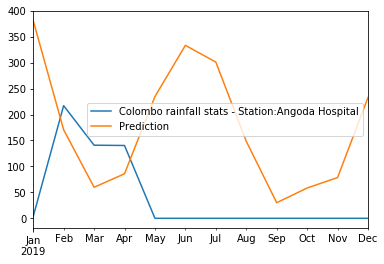

In [71]:
data_n.plot()
pyplot.show()
